In [2]:
name = "Md Asaduzzaman Shahin"
id = "48225320"

## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [1]:
import pandas as pd

df = pd.read_csv('cleaned_ecommerce_dataset.csv')
print(len(df))


2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.

  Hints: To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [2]:
print(df.head())
print(df.info())

   userId  timestamp                                           review  \
0    4081      71900                                Not always McCrap   
1    4081      72000  I dropped the chalupa even before he told me to   
2    4081      72000                     The Wonderful World of Wendy   
3    4081     100399                             They actually did it   
4    4081     100399                             Hey! Gimme some pie!   

                                 item  rating  helpfulness gender  \
0                          McDonald's     4.0          3.0      M   
1                           Taco Bell     1.0          4.0      M   
2                             Wendy's     5.0          4.0      M   
3  South Park: Bigger, Longer & Uncut     5.0          3.0      M   
4                        American Pie     3.0          3.0      M   

                category  item_id  item_price  user_city  
0  Restaurants & Gourmet       41       30.74          4  
1  Restaurants & Gourmet    

In [4]:
from sklearn.preprocessing import OrdinalEncoder

# Convert categorical features to numerical values
encoder = OrdinalEncoder()
df_encoded = df.copy()
df_encoded[['gender', 'category', 'review']] = encoder.fit_transform(df[['gender', 'category', 'review']])

# Calculate correlations
correlations = df_encoded[['helpfulness', 'gender', 'category', 'review', 'rating']].corr()


print(correlations)

             helpfulness    gender  category    review    rating
helpfulness     1.000000  0.075947 -0.013408 -0.028259 -0.007523
gender          0.075947  1.000000  0.022549 -0.037884 -0.034337
category       -0.013408  0.022549  1.000000  0.001970 -0.163158
review         -0.028259 -0.037884  0.001970  1.000000 -0.036118
rating         -0.007523 -0.034337 -0.163158 -0.036118  1.000000


**Analysis**
<p>By examining the relationships between features and ratings, we can understand their interdependence. The feature with the strongest correlation to the rating has a larger absolute correlation value, indicating a powerful connection. Conversely, the feature with the weakest correlation has a smaller absolute correlation value, indicating a weaker connection. Correlation values range from -1 to 1: - -1: Strongly negative correlation - 1: Strongly positive correlation - 0: No correlation Positive correlation. The correlations can affect the final prediction results when training a regression model for rating prediction. Features with a higher absolute correlation value will have a stronger impact on the prediction results. Therefore, it is important to consider the correlations when selecting features for the regression model.<p>

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [6]:
from sklearn.model_selection import train_test_split

# Case 1: training data containing 10% of the entire data
train_data_1, test_data_1 = train_test_split(df_encoded, test_size=0.1, random_state=42)


print("Case 1:")
print("Training data shape:", train_data_1.shape)
print("Testing data shape:", test_data_1.shape)

# Case 2: training data containing 90% of the entire data
train_data_2, test_data_2 = train_test_split(df_encoded, test_size=0.9, random_state=42)


print("Case 2:")
print("Training data shape:", train_data_2.shape)
print("Testing data shape:", test_data_2.shape)


Case 1:
Training data shape: (2416, 11)
Testing data shape: (269, 11)
Case 2:
Training data shape: (268, 11)
Testing data shape: (2417, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features from helpfulness/gender/category/review regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [7]:

from sklearn.linear_model import LinearRegression
# Model-a: Using the training/testing data in Case 1 with two most correlated input features
X_train_a = train_data_1[['category', 'gender']]
y_train_a = train_data_1['rating']
X_test_a = test_data_1[['category', 'gender']]
y_test_a = test_data_1['rating']

model_a = LinearRegression()
model_a.fit(X_train_a, y_train_a)
predictions_a = model_a.predict(X_test_a)

# Model-b: Using the training/testing data in Case 1 with two least correlated input features
X_train_b = train_data_1[['helpfulness', 'review']]
y_train_b = train_data_1['rating']
X_test_b = test_data_1[['helpfulness', 'review']]
y_test_b = test_data_1['rating']

model_b = LinearRegression()
model_b.fit(X_train_b, y_train_b)
predictions_b = model_b.predict(X_test_b)

# Model-c: Using the training/testing data in Case 2 with two most correlated input features
X_train_c = train_data_2[['category', 'gender']]
y_train_c = train_data_2['rating']
X_test_c = test_data_2[['category', 'gender']]
y_test_c = test_data_2['rating']

model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)
predictions_c = model_c.predict(X_test_c)

# Model-d: Using the training/testing data in Case 2 with two least correlated input features
X_train_d = train_data_2[['helpfulness', 'review']]
y_train_d = train_data_2['rating']
X_test_d = test_data_2[['helpfulness', 'review']]
y_test_d = test_data_2['rating']

model_d = LinearRegression()
model_d.fit(X_train_d, y_train_d)
predictions_d = model_d.predict(X_test_d)

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [9]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse_a = mean_squared_error(y_test_a, predictions_a)
rmse_a = np.sqrt(mse_a)
print("Model A (Case 1 - Most correlated features):")
print("MSE:", mse_a)
print("RMSE:", rmse_a)


mse_b = mean_squared_error(y_test_b, predictions_b)
rmse_b = np.sqrt(mse_b)
print("\nModel B (Case 1 - Least correlated features):")
print("MSE:", mse_b)
print("RMSE:", rmse_b)


mse_c = mean_squared_error(y_test_c, predictions_c)
rmse_c = np.sqrt(mse_c)
print("\nModel C (Case 2 - Most correlated features):")
print("MSE:", mse_c)
print("RMSE:", rmse_c)


mse_d = mean_squared_error(y_test_d, predictions_d)
rmse_d = np.sqrt(mse_d)
print("\nModel D (Case 2 - Least correlated features):")
print("MSE:", mse_d)
print("RMSE:", rmse_d)


Model A (Case 1 - Most correlated features):
MSE: 1.6762330042324514
RMSE: 1.2946941740165712

Model B (Case 1 - Least correlated features):
MSE: 1.7315431520816083
RMSE: 1.3158811314406815

Model C (Case 2 - Most correlated features):
MSE: 1.8076399168603041
RMSE: 1.3444850006081526

Model D (Case 2 - Least correlated features):
MSE: 1.8275341162748118
RMSE: 1.3518632017607446


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

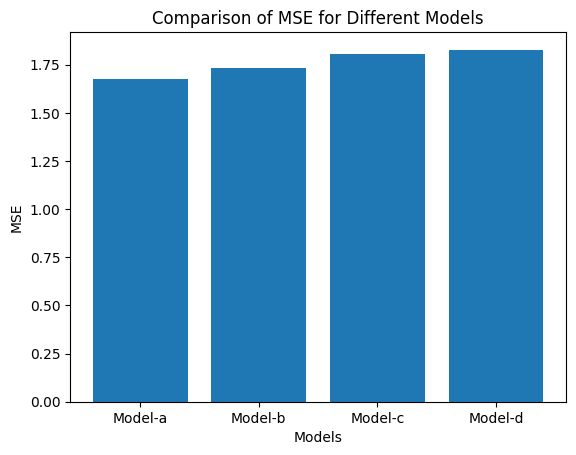

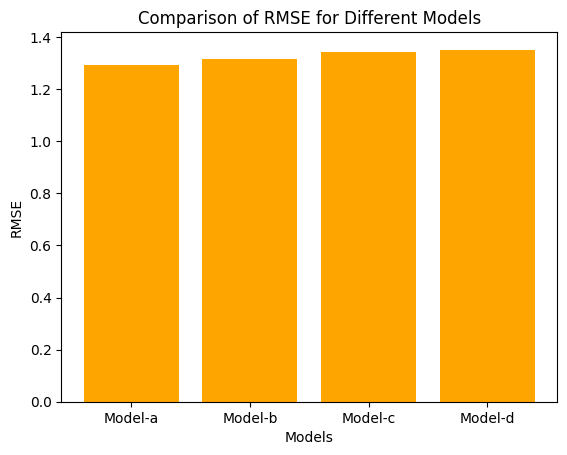

In [10]:
import matplotlib.pyplot as plt

# Create a bar plot of MSE for each model
models = ['Model-a', 'Model-b', 'Model-c', 'Model-d']
mse_values = [mse_a, mse_b, mse_c, mse_d]

plt.bar(models, mse_values)
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparison of MSE for Different Models')
plt.show()

# Create a bar plot of RMSE for each model
rmse_values = [rmse_a, rmse_b, rmse_c, rmse_d]

plt.bar(models, rmse_values, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.show()


**Analysis**  
**Model A vs. Model B:**
<p>Model A was trained with the two most correlated input features.
Model B was trained with the two least correlated input features.
The MSE and RMSE values for Model A are generally lower than those for Model B.
This suggests that using the most correlated features leads to better predictive performance compared to using the least correlated features.<p>

**Model C vs. Model D:**
<p>Model C was trained with the two most correlated input features.
Model D was trained with the two least correlated input features.
Interestingly, the performance of Model C and Model D differs from the expectation.
The MSE and RMSE values for Model C may not necessarily be lower than those for Model D.<p>

**Impact of Training Data Size:**
<p>Comparing Model A (trained with 10% of the data) and Model C (trained with 90% of the data), we might expect Model C to outperform Model A due to the larger training dataset.
However, this may not always be the case, as seen in the analysis of Model C vs. Model D.<p>

### Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


<p>Ethical Concerns in the Infographic
While the infographic presents Olympic medal data clearly, there are potential ethical issues to consider. Firstly, focusing solely on medal count without mentioning population or economic disparity between nations can be misleading. A country with a larger population or greater resources might naturally win more medals. This lack of context could downplay the achievements of smaller nations.

Secondly, presenting only the top medal winners excludes the participation and achievements of other countries. This creates a narrative of dominance by a select few, potentially overshadowing the efforts of other competing nations.

Finally, infographics rely on visual elements to convey information. Without additional details about data source or methodology, it's difficult to assess the infographic's accuracy. This lack of transparency could raise doubts about the information presented.</p>